In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

pd_df = pd.read_csv('adult.data', sep=',', names=columns, na_values='?', skipinitialspace=True)

In [13]:
types = [("age", "i4"), ("workclass", "U25"), ("fnlwgt", "i4"), ("education", "U25"), ("education_num", "i4"), ("marital_status", "U25"), ("occupation", "U25"),
    ("relationship", "U25"), ("race", "U25"), ("sex", "U10"), ("capital_gain", "i4"), ("capital_loss", "i4"), ("hours_per_week", "i4"), ("native_country", "U25"), ("income", "U5")]

np_df = np.genfromtxt("adult.data", missing_values='?', delimiter=',', autostrip=True, dtype=types, encoding="UTF=8", filling_values='Unknown')

**№1 прибираємо пропущені дані**

In [14]:
print(pd_df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [15]:
pd_df.fillna({'workclass': pd_df['workclass'].mode()[0], 'occupation': pd_df['occupation'].mode()[0], 'native_country': pd_df['native_country'].mode()[0]}, inplace=True)
print(pd_df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [16]:
# проходимо по колонкам, якщо її тип - str, то рахуємо кількість пропусків "?"
for name in np_df.dtype.names:
    if np.issubdtype(np_df[name].dtype, np.str_):
        count = np.sum(np_df[name] == '?')
        print(f"{name}: {count} '?'")

workclass: 1836 '?'
education: 0 '?'
marital_status: 0 '?'
occupation: 1843 '?'
relationship: 0 '?'
race: 0 '?'
sex: 0 '?'
native_country: 583 '?'
income: 0 '?'


In [17]:
for value in ['workclass', 'occupation', 'native_country']:
    values = np_df[value][np_df[value] != '?']
    unique, counts = np.unique(values, return_counts=True) # отримуємо унікальні значення і їх кількість

    most_seen = np.argmax(counts) # визначаємо моду
    mode = unique[most_seen]

    np_df[value][np_df[value] == '?'] = mode # замінюємо всі пропуски "?" на моду

In [18]:
for value in ['workclass', 'occupation', 'native_country']:
    if np.issubdtype(np_df[value].dtype, np.str_):
        count = np.sum(np_df[value] == '?')
        print(f"{value}: {count} '?'")

workclass: 0 '?'
occupation: 0 '?'
native_country: 0 '?'


**№2 Проведемо нормування.**

In [19]:
pd_num = pd_df.select_dtypes(include='number') # обираємо числові стовпці

pd_normalized = (pd_num - pd_num.min())/(pd_num.max()-pd_num.min()) # виконуємо нормування за формулою: (data-min(data))/(max(data)-min(data))
pd_categorical = pd_df.select_dtypes(exclude='number') # нечислові стовпц
pd_res = pd.concat([pd_categorical, pd_normalized], axis=1) # об'єднуємо дані

In [20]:
columns = np_df.dtype.names # отримуємо імена колонок

# відокремлюємо числові та рядкові колонки
num_columns = [i for i in columns if np.issubdtype(np_df[i].dtype, np.number)]
categorical_columns = [i for i in columns if np.issubdtype(np_df[i].dtype, np.str_)]

# витягуємо значення
np_categorical = np.column_stack([np_df[f] for f in categorical_columns])
np_num = np.column_stack([np_df[f] for f in num_columns])

np_normalized = (np_num - np_num.min(axis=0)) / (np_num.max(axis=0) - np_num.min(axis=0)) # виконуємо нормування по стовпцях
np_res = np.column_stack((np_categorical, np_normalized)) # об'єднуємо дані

**№3 Побудуємо гістограму**

In [21]:
#pd_res.columns

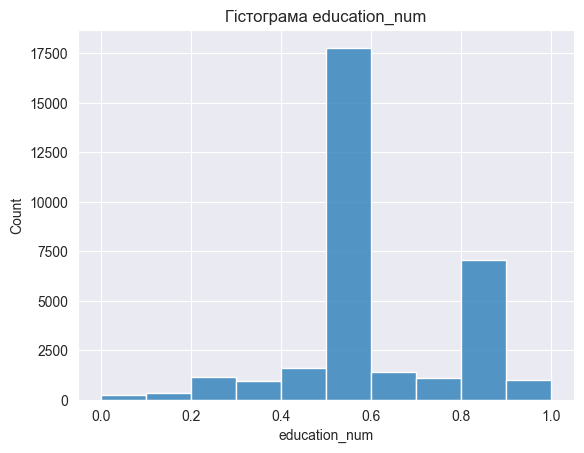

In [22]:
sns.histplot(pd_res['education_num'], bins = 10)

plt.title('Гістограма education_num')

plt.show()

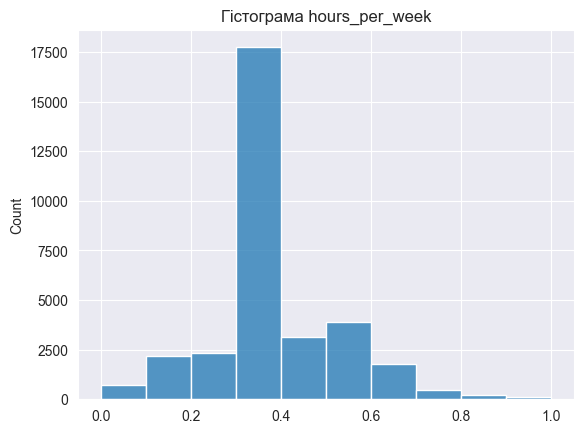

In [34]:
col = np_res[:, -1].astype(float)
sns.histplot(col, bins = 10)

plt.title('Гістограма hours_per_week')

plt.show()

**№4 Побудуємо графік залежності одного integer/real атрибута від іншого.**

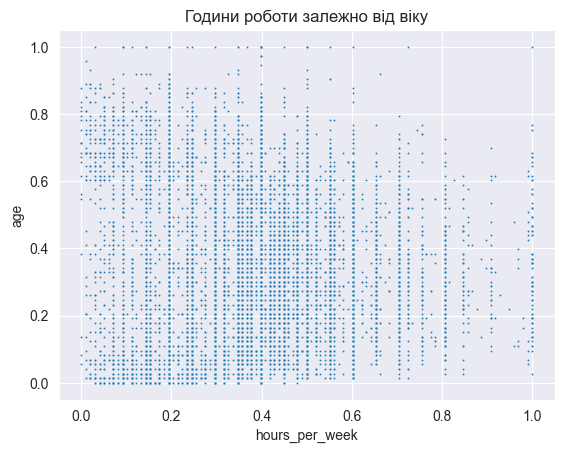

In [24]:
sns.scatterplot(x='hours_per_week', y='age', data=pd_res, s=2)
plt.title('Години роботи залежно від віку')
plt.xlabel('hours_per_week')
plt.ylabel('age')

plt.show()

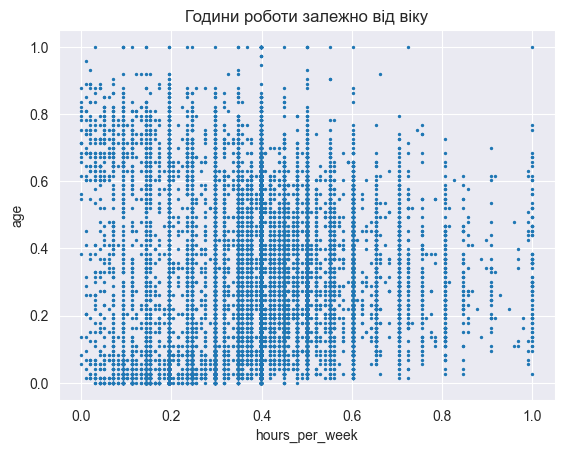

In [25]:
x = np_res[:, -1].astype(float)
y = np_res[:, -6].astype(float)

plt.scatter(x, y, s=2)

plt.title('Години роботи залежно від віку')
plt.xlabel('hours_per_week')
plt.ylabel('age')

plt.show()

**№5 Підрахуємо коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.**

In [26]:
from scipy.stats import pearsonr, spearmanr

arg1 = pd_res['hours_per_week']
arg2 = pd_res['age']

pearson, _ = pearsonr(arg1, arg2)
spearman, _ = spearmanr(arg1, arg2)

print(f"Коефіцієнт Пірсона: {pearson:.4f}")
print(f"Коефіцієнт Спірмена: {spearman:.4f}")

Коефіцієнт Пірсона: 0.0688
Коефіцієнт Спірмена: 0.1429


In [27]:
arg1 = np_res[:,-1].astype(float)
arg2 = np_res[:,-6].astype(float)

pearson, _ = pearsonr(arg1, arg2)
spearman, _ = spearmanr(arg1, arg2)

print(f"Коефіцієнт Пірсона: {pearson:.4f}")
print(f"Коефіцієнт Спірмена: {spearman:.4f}")

Коефіцієнт Пірсона: 0.0688
Коефіцієнт Спірмена: 0.1429


**№6 Проведемо One Hot Encoding категоріального string атрибуту.**

In [28]:
from sklearn.preprocessing import OneHotEncoder

col = pd_df[['occupation']] # обираємо колонку як 2D масив

# створюємо енкодер; sparse_output=False — повертає np масив
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(col) # навчаємо енкодер і трансформуємо в матрицю

columns = encoder.get_feature_names_out(['occupation']) # отримуємо імена нових колонок
encoded_df = pd.DataFrame(encoded, columns=columns) # створюємо новий df з цими колонками

# видаляємо стару колонку і об'єднуємо з df
pd_enc = pd.concat([pd_df.drop('occupation', axis=1), encoded_df], axis=1)

In [29]:
pd_enc

,age,workclass,fnlwgt,education,education_num,marital_status,relationship,race,sex,capital_gain,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
np_res = np.array(np_res, dtype=object)  # приводимо масив до типу object
np_enc = np.hstack((np_res, encoded))  # об'єднуємо його з encoded

In [31]:
np_enc

array([['State-gov', 'Bachelors', 'Never-married', ..., 0.0, 0.0, 0.0],
       ['Self-emp-not-inc', 'Bachelors', 'Married-civ-spouse', ..., 0.0,
        0.0, 0.0],
       ['Private', 'HS-grad', 'Divorced', ..., 0.0, 0.0, 0.0],
       ...,
       ['Private', 'HS-grad', 'Widowed', ..., 0.0, 0.0, 0.0],
       ['Private', 'HS-grad', 'Never-married', ..., 0.0, 0.0, 0.0],
       ['Self-emp-inc', 'HS-grad', 'Married-civ-spouse', ..., 0.0, 0.0,
        0.0]], shape=(32561, 29), dtype=object)

**№7 Проведемо візуалізацію багатовимірних даних.**

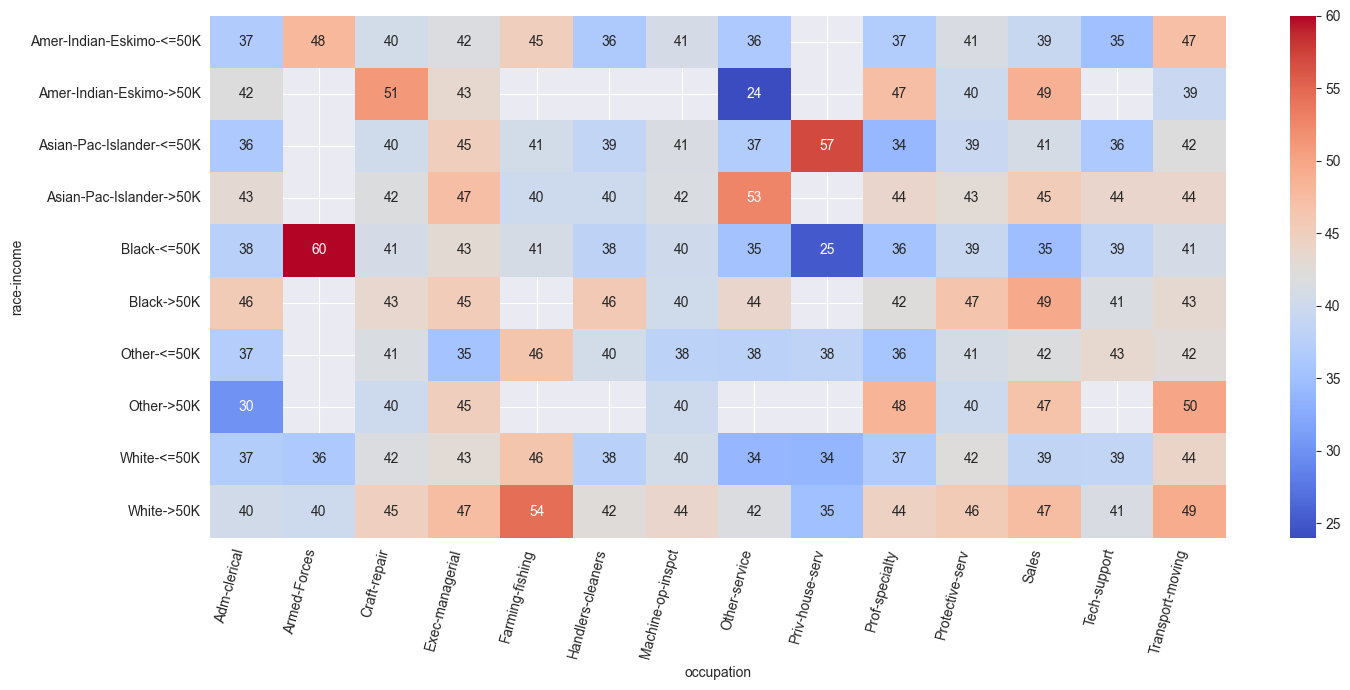

In [36]:
plt.figure(figsize=(15, 7))
# показує середню кількість робочих годин на тиждень в залежності від раси, доходу і професії
table = pd.crosstab(index=[pd_df['race'], pd_df['income']], columns=pd_df['occupation'], values=pd_df['hours_per_week'], aggfunc='mean')
sns.heatmap(table, annot=True, cmap='coolwarm', fmt=".0f")

plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()